# INTRO SEGMENTATION

It consists of segmenting the data according to some criteria and carrying out the previous analyzes considering this separation of the data into segments.

Segmenting the data, a priori, can be done considering 2 main criteria and different approaches to analyze different circumstances of the data:

- **Segment the target**. Segment the target variable into N groups. In this way, there is implicit segmentation in the data and we can see what characteristics can influence more or less different segments of the target variable.
  
- **Segment characteristics by some business condition**. Some business condition or condition of some key characteristic can be considered which segments the data into groups that according to expert knowledge are different groups.

In both cases, when performing data segmentation, what is needed is to have a column in the dataframe with categorical values that represent the data segmentation. This column with categorical values can be strings, and it is recommended that they be so that in the generated graphs you can interpret what the different categories into which the data was separated are.

To segment the data, different techniques can be used, from segmenting by expert knowledge of the business that the data represents as mentioned above or also segmenting by percentiles, etc.

In [1]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('/')[:-1]
root_path = '/'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  /Users/joseortega/Documents/GitHub/exploratory-data-analysis-ds


### 0. Package and load data

In [2]:
from sklearn.datasets import fetch_california_housing
import json
import pandas as pd
import numpy as np

# plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

In [3]:
data_X, data_y = fetch_california_housing(return_X_y=True, as_frame=True)

# joinn and rename dataset
data = data_X.copy()
data['Price'] = data_y
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
data_example = data.copy()

## Generate intervals and save data

### 1. Segment data by target/feature
Segment data by target or feature considering a custom intervals or pecentile/decil

#### hist

<Axes: >

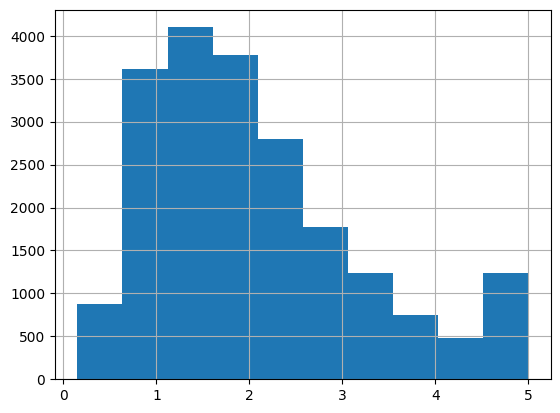

In [5]:
data_example['Price'].hist()

<Axes: >

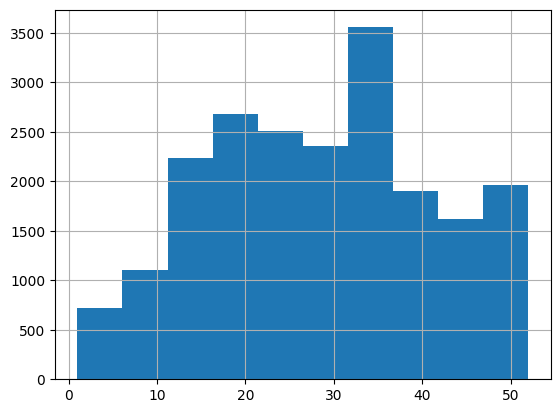

In [6]:
data_example['HouseAge'].hist()

<Axes: >

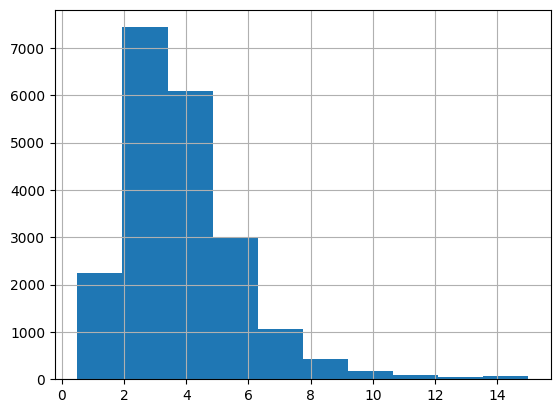

In [7]:
data_example['MedInc'].hist()

#### segment by custom interval

In [8]:
# segment data by price - custom interval
feature_split = 'Price'

# define the limits of the intervals
intervals = [0, 2, 3.5, 5.5]

# define the labels for each segment defined by the custom interval
labels_segments = ['Low Price', 'Medium Price', 'High Price']

# apply pd.cut to generate intervals
data_example[f'{feature_split}_interval'] = pd.cut(data_example[feature_split], bins=intervals, labels=labels_segments, include_lowest=True)

In [9]:
data_example

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Price_interval
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,High Price
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,High Price
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,High Price
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Medium Price
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Medium Price
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,Low Price
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,Low Price
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,Low Price
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,Low Price


#### segment by quartile

In [10]:
quartile = [0, 0.25, 0.5, 0.75, 1]
labels_quartile = ['q1', 'q2', 'q3', 'q4']

data_example[f'quartile_{feature_split}'] = pd.qcut(data_example[feature_split], q = quartile, labels = labels_quartile)

In [11]:
data_example.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Price_interval,quartile_Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,High Price,q4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,High Price,q4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,High Price,q4


#### segment by percentile - quintile

In [12]:
quintile = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels_quintile = ['q1', 'q2', 'q3', 'q4', 'q5']

data_example[f'quintile_{feature_split}'] = pd.qcut(data_example[feature_split], q = quintile, labels = labels_quintile)

In [13]:
data_example.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Price_interval,quartile_Price,quintile_Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,High Price,q4,q5
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,High Price,q4,q5
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,High Price,q4,q5


#### segment by decile

In [14]:
decile = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels_decile = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10']

data_example[f'decile_{feature_split}'] = pd.qcut(data_example[feature_split], q = decile, labels = labels_decile)

In [15]:
data_example.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Price_interval,quartile_Price,quintile_Price,decile_Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,High Price,q4,q5,d10
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,High Price,q4,q5,d9
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,High Price,q4,q5,d9


#### define name of the percertile with its values. 
For example:
- q1 - 25-56
- q2 - 56-70
- q3 - 70-100

Output a list of labels with this names

In [16]:
# params
list_percentile = quartile = [0, 0.25, 0.5, 0.75, 1]
list_labels_percentile_base = labels_quartile = ['q1', 'q2', 'q3', 'q4']
df = data_example
var_segment = feature_split

In [17]:
# get values of each percentile
list_percentile_values = [df[var_segment].quantile(x).round(2) for x in list_percentile]
list_percentile_values

[0.15, 1.2, 1.8, 2.65, 5.0]

In [18]:
# generate a list of string with the start value and end value of each interval
list_percentile_start_end = [] 
for index in range(len(list_percentile_values)-1): 
    start_value = list_percentile_values[index]
    end_value = list_percentile_values[index+1]
    string_start_end = f'{start_value}-{end_value}'
    list_percentile_start_end.append(string_start_end)

list_percentile_start_end

['0.15-1.2', '1.2-1.8', '1.8-2.65', '2.65-5.0']

In [19]:
# output final v1 - only values start end
list_labels_values_range = []
for index in range(len(list_labels_percentile_base)):
    string_output = f'({list_percentile_start_end[index]})'
    list_labels_values_range.append(string_output)
list_labels_values_range

['(0.15-1.2)', '(1.2-1.8)', '(1.8-2.65)', '(2.65-5.0)']

In [20]:
# output final v2 - percentile and values start end
list_labels_percentile_values_range = []
for index in range(len(list_labels_percentile_base)):
    string_output = f'{list_labels_percentile_base[index]} - ({list_percentile_start_end[index]})'
    list_labels_percentile_values_range.append(string_output)
list_labels_percentile_values_range

['q1 - (0.15-1.2)', 'q2 - (1.2-1.8)', 'q3 - (1.8-2.65)', 'q4 - (2.65-5.0)']

### 2. Codes to synthesize the analysis

In [21]:
def custom_segmentation(df, var_segment, intervals_segments, labels_segments):
    """
    Given a dataframe, generate a new column with a categorical values that divide the data in differents segments. 
    Segment the data by a certain variable with a custom segmentation
    
    Args
        df (dataframe): dataframe input
        var_segment (string): variable feature/target used to segment the data
        intervals_segments (list of numbers): list with the thresholds used to segment the data
        labels_segments (list of strings): list with the names of the differents segments generated. Shape: len(intervals_segments) - 1

    Return
        df(dataframe): the input dataframe with a new column with the segment
    """

    # apply pd.cut to generate intervals
    df[f'{var_segment}_segments'] = pd.cut(df[var_segment], 
                                           bins = intervals_segments, 
                                           labels = labels_segments, 
                                           include_lowest = True
                                          )

    # order data by the custom segmentation - to generate plots it is neccesary to sort the data
    # if the plot show a temporal relation like trends plots, it is necessary sort the data by index
    df = df.sort_values(by = [var_segment])
    
    return df

In [22]:
def generate_labels_percentile_segmentation(df, var_segment, list_percentile, list_labels_percentile_base):
    """
    Given a dataframe and a feature to segment in percentiles, calculate the labels of the segmentation
    
    Choices of labels:
        labels_percentile: ['q1', 'q2', 'q3', 'q4']
        labels_values: ['(0.15-1.2)', '(1.2-1.8)', '(1.8-2.65)', '(2.65-5.0)']
        labels_percentile_values: ['q1 - (0.15-1.2)', 'q2 - (1.2-1.8)', 'q3 - (1.8-2.65)', 'q4 - (2.65-5.0)']
        
    Args
        df (dataframe): dataframe input
        var_segment (string): variable feature/target used to segment the data
        list_percentile (list): list of floats with the percentiles to divide the data
        list_labels_percentile_base (list): list of strings with the base labels of percentiles to divide the data 

    Return
        list_labels_percentile_base, list_labels_values_range, list_labels_percentile_values_range (lists). list of the 3 types of labels generated
    """

    # get values of each percentile
    list_percentile_values = [df[var_segment].quantile(x).round(2) for x in list_percentile]
    
    # generate a list of string with the start value and end value of each interval
    list_percentile_start_end = [] 
    for index in range(len(list_percentile_values)-1): 
        start_value = list_percentile_values[index]
        end_value = list_percentile_values[index+1]
        string_start_end = f'{start_value}-{end_value}'
        list_percentile_start_end.append(string_start_end)
    
    # output final v0 - base
    #list_labels_percentile_base
    
    # output final v1 - only values start end
    list_labels_values_range = []
    for index in range(len(list_labels_percentile_base)):
        string_output = f'({list_percentile_start_end[index]})'
        list_labels_values_range.append(string_output)
    
    # output final v2 - percentile and values start end
    list_labels_percentile_values_range = []
    for index in range(len(list_labels_percentile_base)):
        string_output = f'{list_labels_percentile_base[index]} - ({list_percentile_start_end[index]})'
        list_labels_percentile_values_range.append(string_output)
    
    return list_labels_percentile_base, list_labels_values_range, list_labels_percentile_values_range

In [23]:
def percentile_segmentation(df, var_segment, type_percentile):
    """
    Given a dataframe, generate a new column with a categorical values that divide the data in differents segments. 
    Segment the data by a certain variable with a percentile segmentation. the segmentation could be by quartiles, quintiles, deciles
    
    Args
        df (dataframe): dataframe input
        var_segment (string): variable feature/target used to segment the data
        type_percentile(string): type of percentile segmentation
    
    Return
        df(dataframe): the input dataframe with a new column with the segment

    TODO: THE LABELS GERATED AND USED ARE ONLY ['q1 - (0.15-1.2)', 'q2 - (1.2-1.8)', 'q3 - (1.8-2.65)', 'q4 - (2.65-5.0)']
    ADD A ARGS TO SELECT THE KIND OF LABELS
    """

    # validate input - TODO: create a decent unit test
    choices_segmentation = ['quartile', 'quintile', 'decile']
    if type_percentile not in choices_segmentation:
        print('error in choices of segmentation')
        print(f'Possibles choices: {choices_segmentation}')
        return 0

    # quartile
    if type_percentile == 'quartile':
        quartile = [0, 0.25, 0.5, 0.75, 1]
        labels_quartile_base = ['q1', 'q2', 'q3', 'q4']
        _, _,  labels_quartile = generate_labels_percentile_segmentation(df, var_segment, quartile, labels_quartile_base)
        df[f'quartile_{var_segment}'] = pd.qcut(df[var_segment], q = quartile, labels = labels_quartile)
    
    # quintile
    if type_percentile == 'quintile':
        quintile = [0, 0.2, 0.4, 0.6, 0.8, 1]
        labels_quintile_base = ['q1', 'q2', 'q3', 'q4', 'q5']
        _, _,  labels_quintile = generate_labels_percentile_segmentation(df, var_segment, quintile, labels_quintile_base)
        df[f'quintile_{var_segment}'] = pd.qcut(df[var_segment], q = quintile, labels = labels_quintile)


    # decile
    if type_percentile == 'decile':
        decile = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        labels_decile_base = ['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10']
        _, _,  labels_decile = generate_labels_percentile_segmentation(df, var_segment, decile, labels_decile_base)
        df[f'decile_{var_segment}'] = pd.qcut(df[var_segment], q = decile, labels = labels_decile)

    return df

In [24]:
# example 1 - target price - custom
data = custom_segmentation(df = data, 
                           var_segment = 'Price', 
                           intervals_segments = [0, 2, 3.5, 5.5], 
                           labels_segments = ['Low Price', 'Medium Price', 'High Price']
                          )

In [25]:
# example 2 - feature HouseAge - custom
feature_ = 'HouseAge'
data = custom_segmentation(df = data,
                           var_segment = feature_, 
                           intervals_segments = [data[feature_].min(), 20, 40, data[feature_].max()], 
                           labels_segments = ['Low Age', 'Medium Age', 'High Age']
                          )

In [26]:
# example 3 - feature MedInc by quartile
feature_ = 'MedInc'
data = percentile_segmentation(df = data, 
                        var_segment = feature_, 
                        type_percentile = 'quartile'
                       )

In [27]:
# example 4 - feature MedInc by percentile - error
feature_ = 'MedInc'
percentile_segmentation(df = data, 
                        var_segment = feature_, 
                        type_percentile = 'percentile'
                       )

error in choices of segmentation
Possibles choices: ['quartile', 'quintile', 'decile']


0

### SAVE DATA SEGMENTATION

In [28]:
data.to_pickle('data/data_segmentation.pkl')

### READ DATA

In [29]:
pd.read_pickle('data/data_segmentation.pkl')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Price_segments,HouseAge_segments,quartile_MedInc
3130,4.8750,1.0,5.533333,1.000000,32.0,2.133333,35.08,-117.95,1.41700,Low Price,Low Age,q4 - (4.74-15.0)
19536,4.2500,1.0,20.125000,2.928571,402.0,3.589286,37.65,-120.93,1.89200,Low Price,Low Age,q3 - (3.53-4.74)
18972,5.2636,1.0,7.694030,1.279851,872.0,3.253731,38.23,-122.00,1.91300,Low Price,Low Age,q4 - (4.74-15.0)
12286,1.6250,1.0,3.000000,1.000000,8.0,4.000000,33.86,-116.95,0.55000,Low Price,Low Age,q1 - (0.5-2.56)
12077,6.2308,2.0,8.801008,1.373804,5964.0,3.004534,33.87,-117.64,2.57900,Medium Price,Low Age,q4 - (4.74-15.0)
...,...,...,...,...,...,...,...,...,...,...,...,...
15808,5.0731,52.0,5.248954,1.037657,855.0,1.788703,37.76,-122.44,4.05400,High Price,High Age,q4 - (4.74-15.0)
4117,5.5291,52.0,5.937984,1.049096,1203.0,3.108527,34.14,-118.22,2.74600,Medium Price,High Age,q4 - (4.74-15.0)
16017,6.7228,52.0,7.433249,1.022670,1115.0,2.808564,37.72,-122.46,4.05200,High Price,High Age,q4 - (4.74-15.0)
5121,3.0625,52.0,6.108959,1.113801,1167.0,2.825666,33.96,-118.31,1.27400,Low Price,High Age,q2 - (2.56-3.53)
